In [3]:
import numpy as np # linear algebra
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [15]:
import pandas as pd

matches = pd.read_excel(r'C:\Users\praneeth\1 dataset1_test.xlsx')


In [16]:
matches.head()

,Batsman,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns
0,1,33,78.0,56,5,0,58.92,3,caught,2
1,1,33,77.0,49,6,0,67.34,3,caught,4
2,1,215,503.0,346,25,1,62.13,3,lbw,1
3,1,58,67.0,48,9,0,120.83,3,bowled,3
4,1,7,26.0,18,1,0,38.88,3,caught,1


In [20]:
Records=pd.DataFrame(matches)
Records.columns = ['Batsman', 'Runs', 'Minute', 'Ballfaced', 'fours', 'sixes', 'StrikeRate', 'Position', 'DismissalAt', 'Innings']

In [22]:
batsman1 = Records[(Records.Batsman==1)]
batsman2 = Records[(Records.Batsman==2)]
batsman3 = Records[(Records.Batsman==3)]
batsman4 = Records[(Records.Batsman==4)]
batsman5 = Records[(Records.Batsman==5)]
batsman6 = Records[(Records.Batsman==6)]

              Runs
Batsman           
1        60.877193
2        57.557692
3        49.078125
4        49.406780
5        53.026316
6        35.769231


<Axes: title={'center': ' Average run of Batsman'}, xlabel='Batsman', ylabel='Average Runs'>

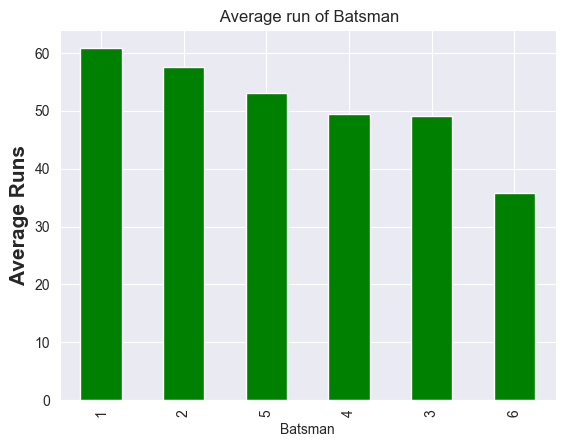

In [23]:
avgOfPlayersGrpBy= Records[['Batsman','Runs']].groupby('Batsman').mean()
print(avgOfPlayersGrpBy)
avgOfPlayersGrpByPlot=avgOfPlayersGrpBy.sum(axis = 1).sort_values(ascending = False)
plt.ylabel('Average Runs',fontsize=15, fontweight='bold')
plt.rcParams["figure.figsize"] = [7,4]
avgOfPlayersGrpByPlot.plot(kind ='bar',color='green' ,title = " Average run of Batsman")

         fours  sixes  Runs  totalRunFromBoundary  runByFour  runBysix
Batsman                                                               
1          382     10  3470                  1588       1528        60
2          315      9  2993                  1314       1260        54
3          388      7  3141                  1594       1552        42
4          348     21  2915                  1518       1392       126
5          237      6  2015                   984        948        36
6          102      6   930                   444        408        36


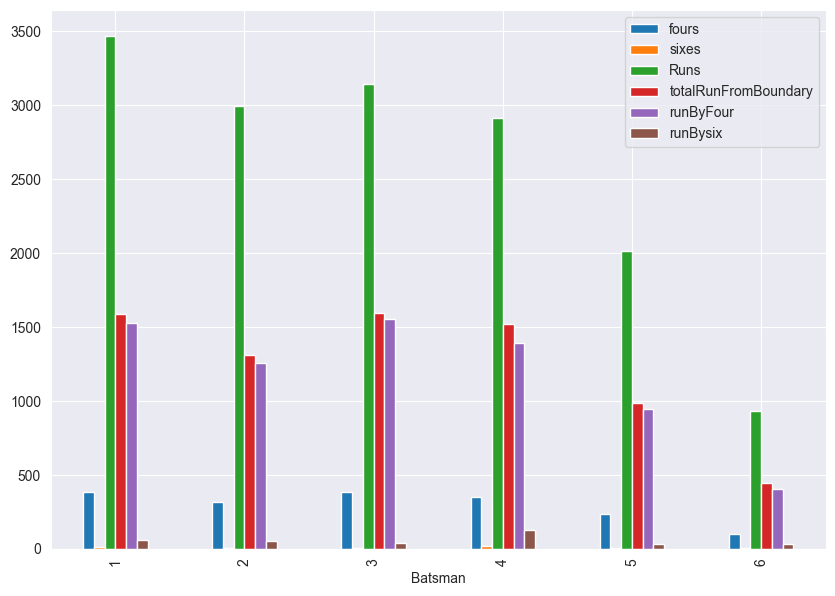

In [24]:
runBysixFour= Records[['Batsman','fours','sixes','Runs']].groupby('Batsman').sum() #run from boundary from each batsman
runBysixFour['totalRunFromBoundary']=runBysixFour['fours']*4+runBysixFour['sixes']*6
runBysixFour['runByFour']=runBysixFour['fours']*4
runBysixFour['runBysix']=runBysixFour['sixes']*6
runBysixFour['totalRunFromBoundary']
print(runBysixFour)
plt.rcParams["figure.figsize"] = [10,7]
plt.show(runBysixFour.plot.bar())

Average of Batsman 1:  60.87719298245614
Maximum of Batsman 1 in a Match:  239


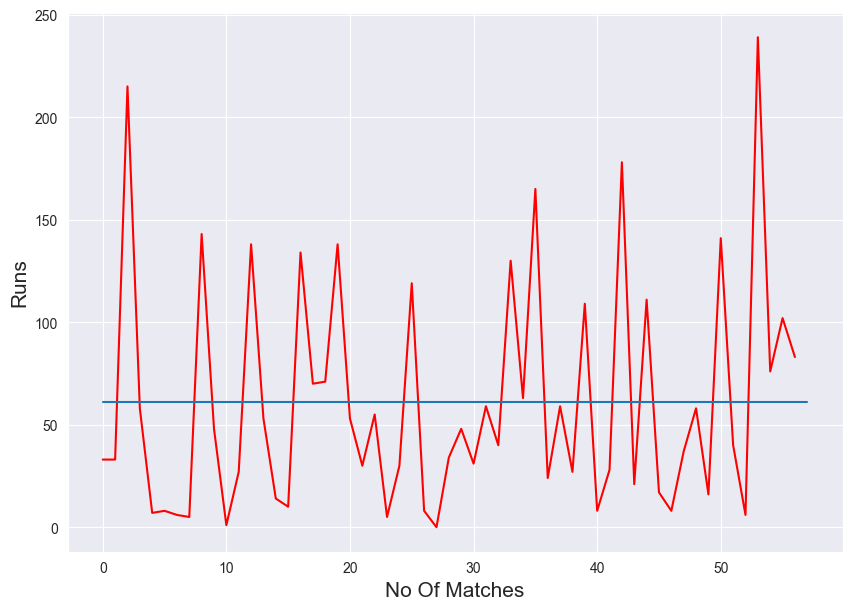

In [25]:
batsman1_run=batsman1['Runs'] #batsman 1 runs
print(('Average of Batsman 1: '),  batsman1_run.mean())
print(('Maximum of Batsman 1 in a Match: '),  batsman1_run.max())
batsman1_run.plot(color='red')
p1=[batsman1_run.count(),0]
#x1,x2
p2=[batsman1_run.mean(),batsman1_run.mean()]
plt.rcParams["figure.figsize"] = [10,7]
plt.plot(p1,p2)
plt.xlabel('No Of Matches',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.rcParams["figure.figsize"] = [12,7]
plt.show()
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close()

In [29]:
batsman1_avg = []
i = 0
for row in batsman1_run:  # batsman1_run is probably a list/Series of match-wise runs
    if i == 0:
        batsman1_avg.append(row)
    else:
        value = (batsman1_avg[i-1]*i + row) / (i+1)  # running average formula
        batsman1_avg.append(value)
    i += 1

batsman1['avgRunPerMatch'] = batsman1_avg


C:\Users\Dell\AppData\Local\Temp\ipykernel_9012\2000272903.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsman1['avgRunPerMatch'] = batsman1_avg


Average of Batsman 1:  60.87719298245614
Maximum of Batsman 1 in a Match:  239


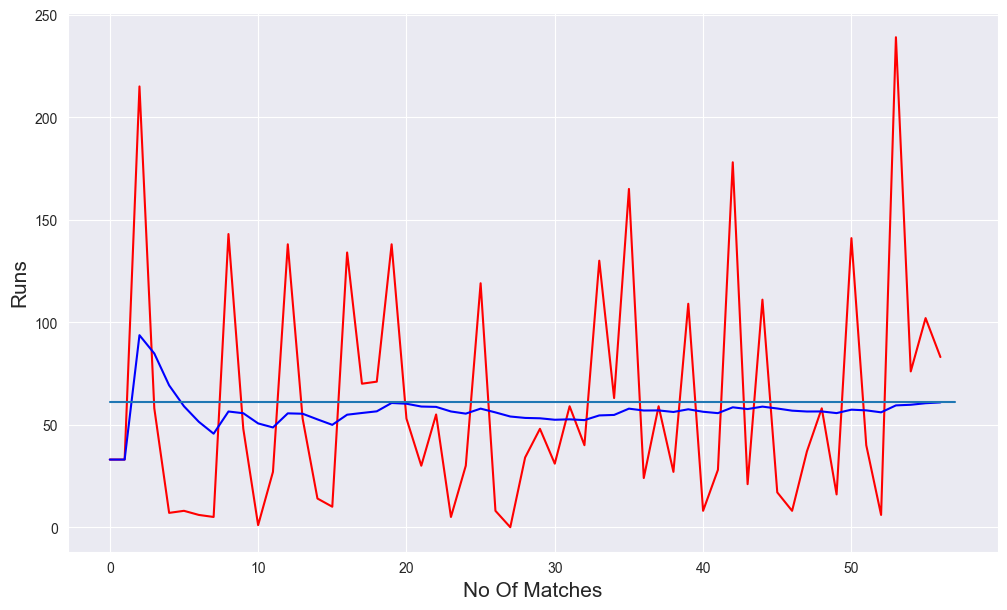

In [34]:
#batsman 1 runs
batsman1_avg_run=batsman1['avgRunPerMatch']
#batsman 1 average runs concecutive matches
print(('Average of Batsman 1: '),  batsman1_run.mean())
print(('Maximum of Batsman 1 in a Match: '),  batsman1_run.max())
batsman1_run.plot(color='red')
batsman1_avg_run.plot(color='blue')
p1=[batsman1_run.count(),0]
#x1,x2
p2=[batsman1_run.mean(),batsman1_run.mean()]
plt.rcParams["figure.figsize"] = [10,7]
plt.plot(p1,p2)
plt.xlabel('No Of Matches',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.rcParams["figure.figsize"] = [12,7]
plt.show()
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close()

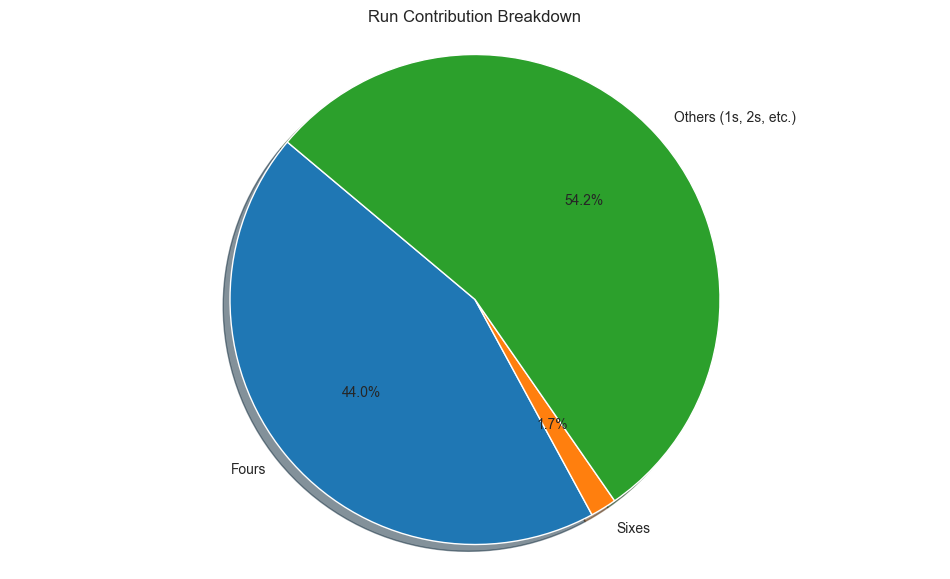

In [35]:
labels = ['Fours', 'Sixes', 'Others (1s, 2s, etc.)']

# Calculate sizes
fours_runs = batsman1['fours'].sum() * 4
sixes_runs = batsman1['sixes'].sum() * 6
total_runs = batsman1['Runs'].sum()
others_runs = total_runs - (fours_runs + sixes_runs)

sizes = [fours_runs, sixes_runs, others_runs]

# Plot pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Run Contribution Breakdown')
plt.show()


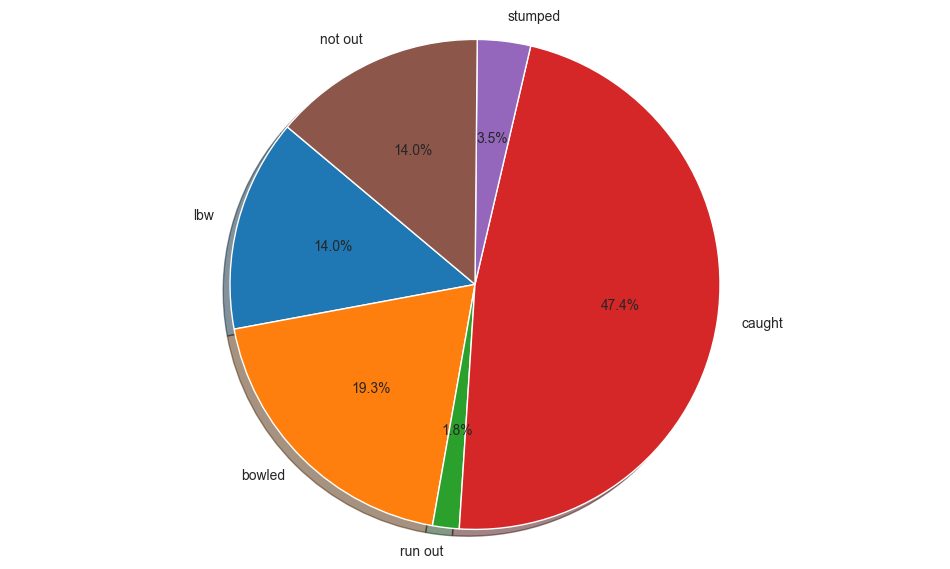

In [36]:
batsman1_Dismissal_lbw =len( batsman1[(batsman1.DismissalAt=='lbw')])
batsman1_Dismissal_bowled =len( batsman1[(batsman1.DismissalAt=='bowled')])
batsman1_Dismissal_runout =len( batsman1[(batsman1.DismissalAt=='run out')])
batsman1_Dismissal_caught =len( batsman1[(batsman1.DismissalAt=='caught')])
batsman1_Dismissal_notout=len( batsman1[(batsman1.DismissalAt=='not out')])
batsman1_Dismissal_stumped =len( batsman1[(batsman1.DismissalAt=='stumped')])
labels = 'lbw', 'bowled', 'run out','caught','stumped','not out'
sizes = [batsman1_Dismissal_lbw,batsman1_Dismissal_bowled,batsman1_Dismissal_runout,
batsman1_Dismissal_caught,batsman1_Dismissal_stumped,batsman1_Dismissal_notout]
plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Total no of matches of Batsman 1 at position 3: 25
Total no of matches of Batsman 1 at position 4: 30

Average runs of Batsman 1 at position 3: 58.44
Average runs of Batsman 1 at position 4: 65.7

Total runs of Batsman 1 at position 3: 1461
Total runs of Batsman 1 at position 4: 1971

Average strike rate of Batsman 1 at position 3: 70.8776
Average strike rate of Batsman 1 at position 4: 55.248666666666665



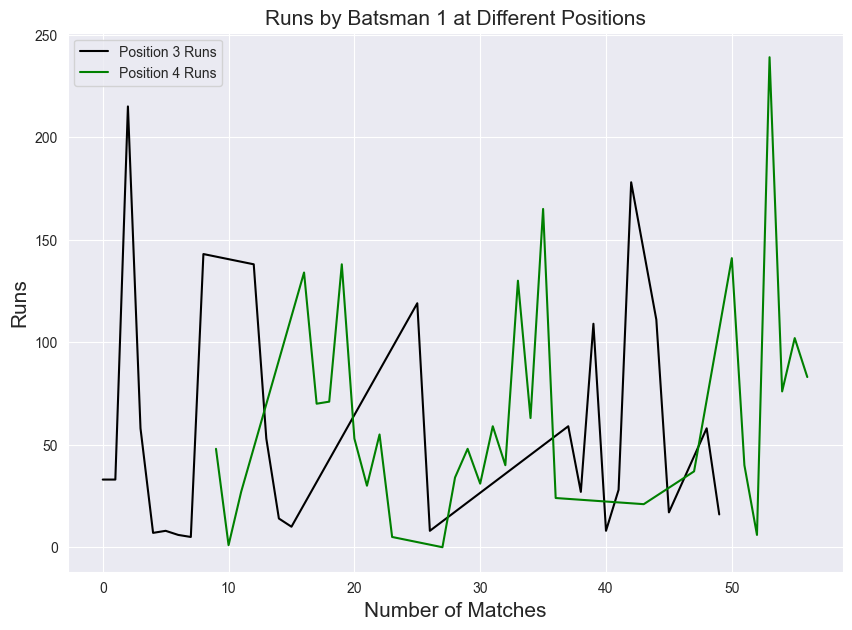

In [37]:
import matplotlib.pyplot as plt

# Filter batsman1 data based on position 3 and 4
batsman1_runat_3 = batsman1[batsman1['Position'] == 3]
batsman1_runat_4 = batsman1[batsman1['Position'] == 4]

# Extract Runs and StrikeRate for position 3 and 4
batsman1_runat_3_runs = batsman1_runat_3['Runs']
batsman1_runat_4_runs = batsman1_runat_4['Runs']

batsman1_runat_3_strikerate = batsman1_runat_3['StrikeRate']
batsman1_runat_4_strikerate = batsman1_runat_4['StrikeRate']

# Print statements for total number of matches, averages, and total runs
print(f'Total no of matches of Batsman 1 at position 3: {batsman1_runat_3_runs.count()}')
print(f'Total no of matches of Batsman 1 at position 4: {batsman1_runat_4_runs.count()}\n')

print(f'Average runs of Batsman 1 at position 3: {batsman1_runat_3_runs.mean()}')
print(f'Average runs of Batsman 1 at position 4: {batsman1_runat_4_runs.mean()}\n')

print(f'Total runs of Batsman 1 at position 3: {batsman1_runat_3_runs.sum()}')
print(f'Total runs of Batsman 1 at position 4: {batsman1_runat_4_runs.sum()}\n')

print(f'Average strike rate of Batsman 1 at position 3: {batsman1_runat_3_strikerate.mean()}')
print(f'Average strike rate of Batsman 1 at position 4: {batsman1_runat_4_strikerate.mean()}\n')

# Plotting the runs for position 3 and position 4
plt.figure(figsize=(10, 7))
batsman1_runat_3_runs.plot(label='Position 3 Runs', color='black')
batsman1_runat_4_runs.plot(label='Position 4 Runs', color='green')

# Labeling the axes and giving the plot a title
plt.xlabel('Number of Matches', fontsize=15)
plt.ylabel('Runs', fontsize=15)
plt.title('Runs by Batsman 1 at Different Positions', fontsize=15)

# Show the plot
plt.legend()
plt.show()


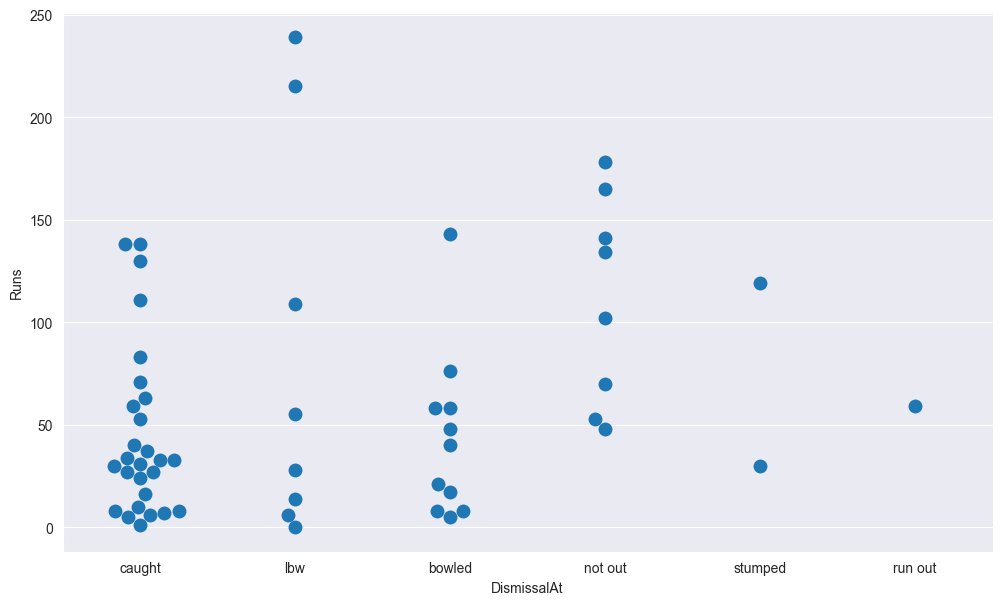

In [38]:
ax=sns.swarmplot(y="Runs", x="DismissalAt",size=10, data=batsman1)

C:\Users\Dell\PyCharmMiscProject\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


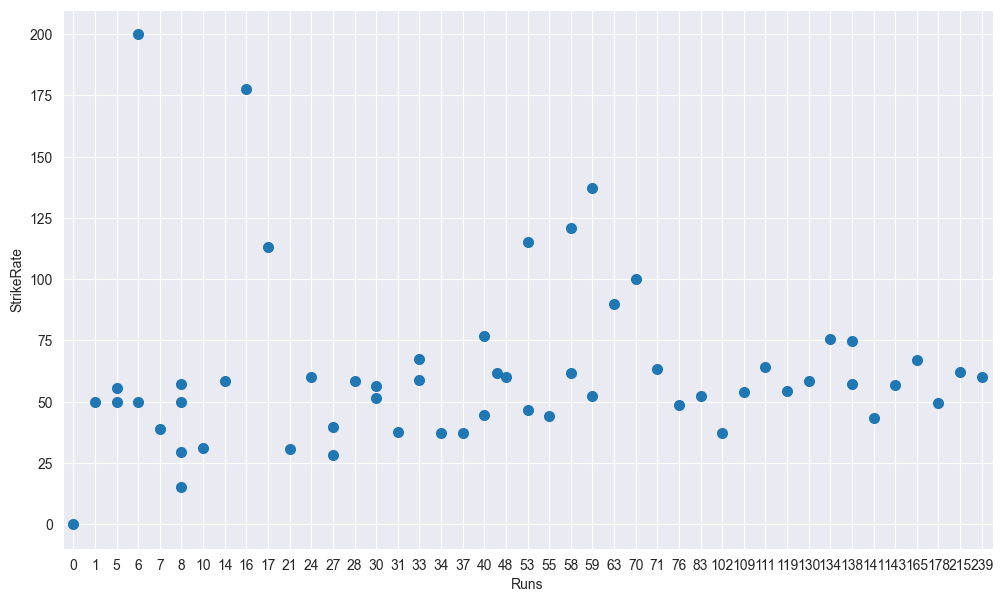

In [39]:
ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8,data=batsman1)
ax.grid(True)

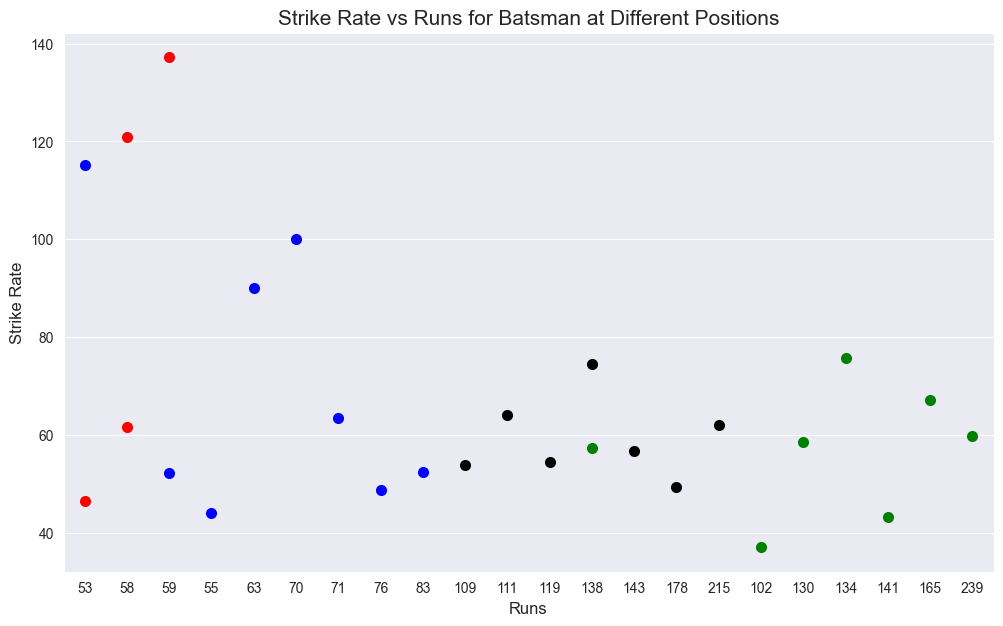

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data based on conditions and plot different categories

# Position 3 with 50 <= Runs < 100
sns.swarmplot(y="StrikeRate", x="Runs", size=8, color='red',
              data=batsman1[(batsman1.Position == 3) & (batsman1.Runs >= 50) & (batsman1.Runs < 100)])

# Position 4 with 50 <= Runs < 100
sns.swarmplot(y="StrikeRate", x="Runs", size=8, color='blue',
              data=batsman1[(batsman1.Position == 4) & (batsman1.Runs >= 50) & (batsman1.Runs < 100)])

# Position 3 with Runs >= 100
sns.swarmplot(y="StrikeRate", x="Runs", size=8, color='black',
              data=batsman1[(batsman1.Position == 3) & (batsman1.Runs >= 100)])

# Position 4 with Runs >= 100
sns.swarmplot(y="StrikeRate", x="Runs", size=8, color='green',
              data=batsman1[(batsman1.Position == 4) & (batsman1.Runs >= 100)])

# Labeling the axes and title
plt.xlabel('Runs', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.title('Strike Rate vs Runs for Batsman at Different Positions', fontsize=15)

# Show plot
plt.show()


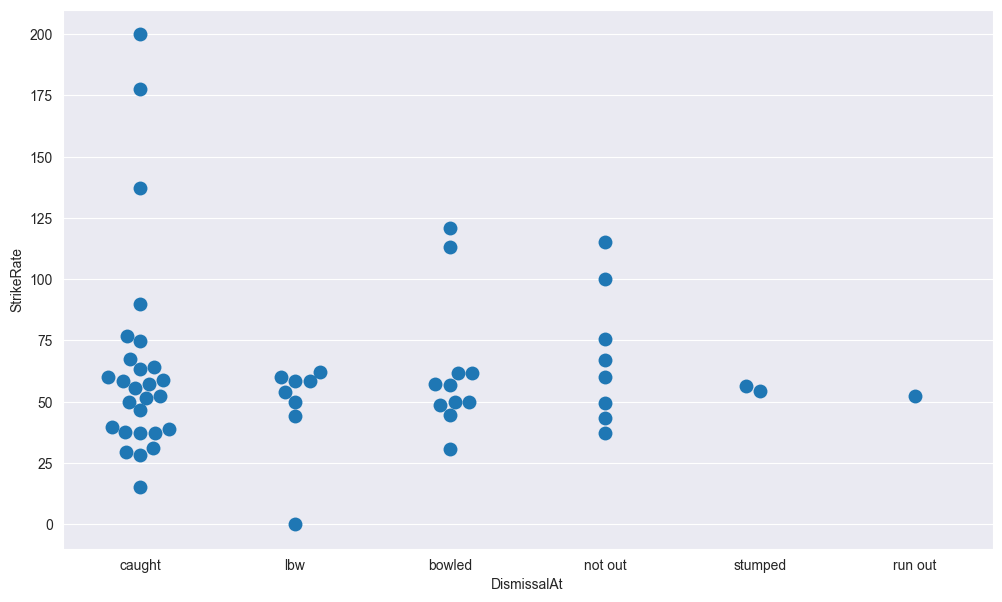

In [41]:
ax=sns.swarmplot(y="StrikeRate", x="DismissalAt",size=10, data=batsman1)

Average of Batsman 2: 57.55769230769231
Maximum of Batsman 2 in a Match: 243


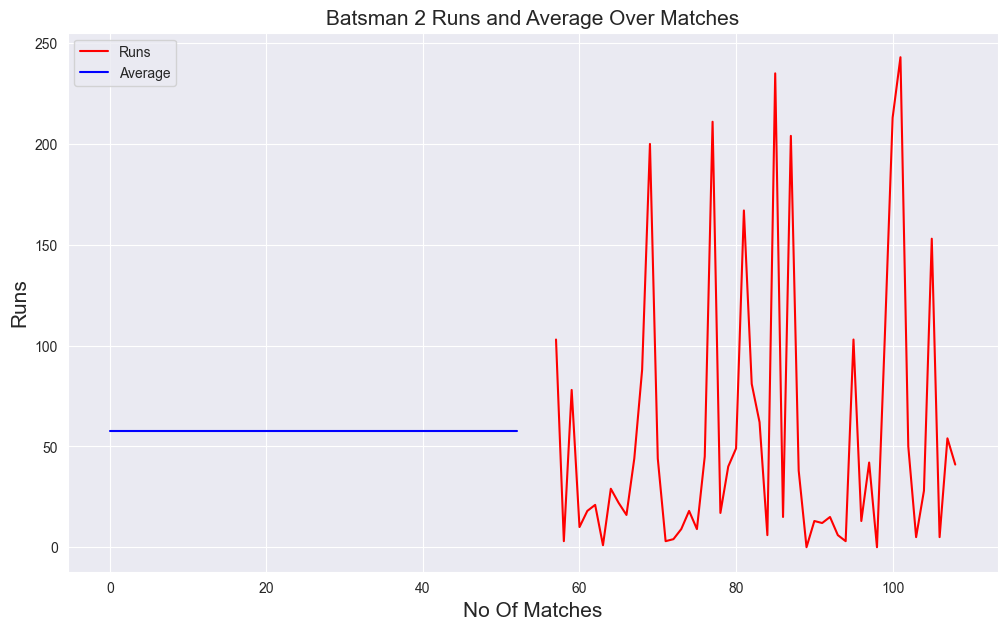

In [42]:
import matplotlib.pyplot as plt

# Batsman 2 runs
batsman2_run = batsman2['Runs']  # Batsman 2 runs

# Printing statistics
print(f'Average of Batsman 2: {batsman2_run.mean()}')
print(f'Maximum of Batsman 2 in a Match: {batsman2_run.max()}')

# Plotting the runs
batsman2_run.plot(color='red', label='Runs')

# Create a line showing the average of Batsman 2 across all matches
p1 = [0, batsman2_run.count()]  # X-axis range from 0 to total number of matches
p2 = [batsman2_run.mean(), batsman2_run.mean()]  # Line at the average value

# Plot the average line
plt.plot(p1, p2, color='blue', label='Average')

# Customizing the plot
plt.xlabel('No Of Matches', fontsize=15)
plt.ylabel('Runs', fontsize=15)
plt.title('Batsman 2 Runs and Average Over Matches', fontsize=15)
plt.legend()

# Show plot
plt.show()

# Clear any previously opened figures (Optional)
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close()
